In [12]:
import os
import pandas as pd

pd.set_option('display.max_rows', None)

# res_path = "outputs-interpolation/INTERPOLATION-MIN-INF/repairs_average.csv"
res_path = "outputs-interpolation/INTERPOLATION-MIN/repairs_average.csv"
# res_path = "outputs-interpolation/INTERPOLATION-ALLGARS-INF/repairs_average.csv"
# res_path = "outputs-interpolation/INTERPOLATION-ALLGARS/repairs_average.csv"
# res_path = "outputs-symbolic/JVTS/repairs_average.csv"
# res_path = "outputs-symbolic/GLASS/repairs_average.csv"

# spectra_folder = "inputs/SIMPLE"
# spectra_folder = "inputs/AMBA-1"
# spectra_folder = "inputs/AMBA-2"
spectra_folder = "inputs/SYNTECH15-UNREAL"
# spectra_folder = "inputs/SYNTECH15-1UNREAL"

specs = [f for f in os.listdir(spectra_folder) if f.endswith('.spectra')]
specs.sort()

# specs = []
# specs.extend(sorted([f for f in os.listdir("inputs/SIMPLE") if f.endswith('.spectra')]))
# specs.extend(sorted([f for f in os.listdir("inputs/AMBA-1") if f.endswith('.spectra')]))
# specs.extend(sorted([f for f in os.listdir("inputs/AMBA-2") if f.endswith('.spectra')]))
# specs.extend(sorted([f for f in os.listdir("inputs/SYNTECH15-UNREAL") if f.endswith('.spectra')]))
# specs.extend(sorted([f for f in os.listdir("inputs/SYNTECH15-1UNREAL") if f.endswith('.spectra')]))
# specs.sort()

df = pd.DataFrame({"Filename": specs})

df_res = pd.read_csv(res_path)
df = df.merge(df_res[[
    "Filename",
    "NumRepairs",
    # "Effectiveness",
    # "UniqueEffectiveness",
    "Runtime",
    "TimeToFirst",
    "NodesExplored",
    "Runs",
]], how="left", on="Filename")

df["Repaired"] = df["NumRepairs"] > 0
# df = df[df["NumRepairs"] > 0]
# df = df[df["Repaired"] == True]
# df = df[df["Repaired"] == False]

# df = df[df["Runtime"] > 600]
# df = df[df["Runtime"] <= 600]

# df = df[df["NodesExplored"] < 3]
# df = df[df["NodesExplored"] == 1]
# df = df[df["NodesExplored"] >= 3]

# df = df[df["Runs"] < 10]

# df["System"] = df["Filename"].apply(lambda x: x[0])
# df = df[df["System"] == "H"]
# df = df.groupby("System").size().reset_index()

# df.to_csv("outputs/INTERPOLATION_repaired.csv")
# df.to_csv("outputs/JVTS_repaired.csv")

print(len(df))
df

14


,Filename,NumRepairs,Runtime,TimeToFirst,NodesExplored,Runs,Repaired
0,ColorSortLTL3_689_ColorSort_fixed_unrealizable...,0.0,1.300924,NaN,1.0,10,False
1,ColorSortLTLUnrealizable1_790_ColorSort_unreal...,1.0,3.719809,3.715098,4.7,10,True
2,ColorSortLTLUnrealizable2_791_ColorSort_unreal...,0.0,659.123609,NaN,1.0,10,False
3,GyroUnrealizable_Var1_710_GyroAspect_unrealiza...,0.1,0.307448,0.157537,2.9,10,True
4,GyroUnrealizable_Var2_710_GyroAspect_unrealiza...,0.7,0.299490,0.251501,2.4,10,True
5,HumanoidLTL_458_Humanoid_fixed_unrealizable.sp...,1.0,0.261459,0.256789,2.6,10,True
6,HumanoidLTL_503_Humanoid_fixed_unrealizable.sp...,0.0,0.783164,NaN,5.0,10,False
7,HumanoidLTL_531_Humanoid_unrealizable.spectra,1.0,5.929020,5.924507,2.0,10,True
8,HumanoidLTL_713_Humanoid_unrealizable.spectra,1.0,1.339997,1.334652,8.3,10,True
9,HumanoidLTL_741_Humanoid_unrealizable.spectra,1.0,0.434678,0.430186,2.0,10,True


file://outputs-interpolation/INTERPOLATION-MIN-INF/run-4/SYNTECH15-1UNREAL/ColorSortLTL2TAG_789_ColorSort_1_INTERPOLATION-MIN-INF_output.txt
file://outputs-interpolation/INTERPOLATION-MIN-INF/run-9/SYNTECH15-1UNREAL/ColorSortLTL2TAG_789_ColorSort_1_INTERPOLATION-MIN-INF_output.txt
file://outputs-interpolation/INTERPOLATION-MIN-INF/run-10/SYNTECH15-1UNREAL/ColorSortLTL2TAG_789_ColorSort_1_INTERPOLATION-MIN-INF_output.txt
file://outputs-interpolation/INTERPOLATION-MIN-INF/run-2/SYNTECH15-1UNREAL/ColorSortLTL2TAG_789_ColorSort_1_INTERPOLATION-MIN-INF_output.txt
file://outputs-interpolation/INTERPOLATION-MIN-INF/run-8/SYNTECH15-1UNREAL/ColorSortLTL2TAG_789_ColorSort_1_INTERPOLATION-MIN-INF_output.txt
file://outputs-interpolation/INTERPOLATION-MIN-INF/run-3/SYNTECH15-1UNREAL/ColorSortLTL2TAG_789_ColorSort_1_INTERPOLATION-MIN-INF_output.txt
file://outputs-interpolation/INTERPOLATION-MIN-INF/run-6/SYNTECH15-1UNREAL/ColorSortLTL2TAG_789_ColorSort_1_INTERPOLATION-MIN-INF_output.txt
file://outpu

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# specs_folder = "inputs/SYNTECH15-UNREAL"
specs_folder = "inputs/SYNTECH15-1UNREAL"

specs = [f for f in os.listdir(specs_folder) if f.endswith('.spectra')]
specs.sort()

df = pd.DataFrame({"Filename": specs})

df_interpolation = pd.read_csv("outputs-interpolation/INTERPOLATION-MIN-INF/repairs_average.csv")
df_interpolation = df.merge(df_interpolation, how="left", on="Filename")
df_interpolation = df_interpolation.fillna(0)

df_jvts = pd.read_csv("outputs-symbolic/JVTS/repairs_average.csv")
df_jvts = df.merge(df_jvts, how="left", on="Filename")
df_jvts = df_jvts.fillna(0)
df_jvts["UniqueEffectiveness"] = df_jvts["UniqueSols"] / df_jvts["NodesExplored"]

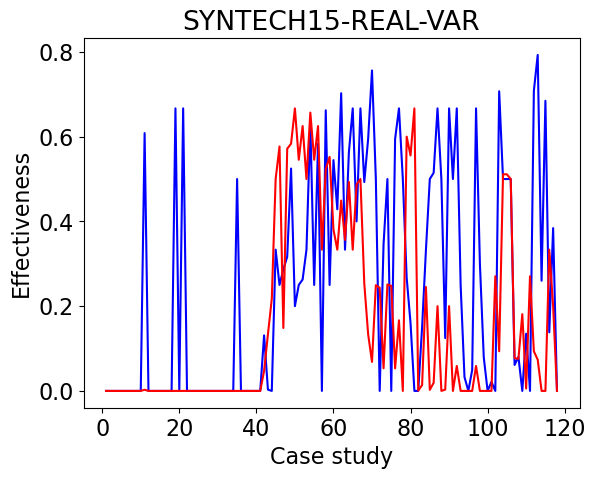

In [67]:
# title = "SYNTECH15-UNREAL"
title = "SYNTECH15-REAL-VAR"

# column = "NodesExplored"
# column = "NumRepairs"
# column = "Effectiveness"
# column = "UniqueSols"
column = "UniqueEffectiveness"
# column = "DepthToFirst"
# column = "NodesToFirst"
# column = "NumYUnsat"
# column = "NumYUnsatNoFalse"

# label = "# Nodes Explored"
# label = "# Solutions"
label = "Effectiveness"
# label = "# Unique solutions"
# label = "Depth to first repair"
# label = "# Nodes to first repair"
# label = "# y-unsat w/o FALSE"


marker = "s" if len(df) < 20 else None

epsilon = None
# epsilon = 1e-1
# epsilon = 1e-2

if epsilon is not None:
    df_interpolation[column] = df_interpolation[column] + epsilon
    df_jvts[column] = df_jvts[column] + epsilon

x_ticks = range(1, len(df)+1)

plt.title(title)
plt.rcParams.update({'font.size': 16})

# Plot the data with specified colors
plt.plot(x_ticks, df_interpolation[column], label='Interpolation-S', color='blue', marker=marker)
plt.plot(x_ticks, df_jvts[column], label='JVTS-Repair', color='red', marker=marker)

# Add labels and title
plt.xlabel('Case study')
plt.ylabel(label)

if len(df) < 20:
    plt.xticks(x_ticks)

# plt.yticks([i/10 for i in range(11)])
# plt.yscale('log')

# Place legend on the right outside of the graph
# plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.show() 

In [13]:
import os
import pandas as pd
import matplotlib.pyplot as plt

specs_folder = "inputs/SYNTECH15-UNREAL"
# specs_folder = "inputs/SYNTECH15-1UNREAL"

specs = []
specs.extend(sorted([f for f in os.listdir("inputs/SIMPLE") if f.endswith('.spectra')]))
specs.extend(sorted([f for f in os.listdir("inputs/AMBA-1") if f.endswith('.spectra')]))
specs.extend(sorted([f for f in os.listdir("inputs/AMBA-2") if f.endswith('.spectra')]))
specs.extend(sorted([f for f in os.listdir("inputs/SYNTECH15-UNREAL") if f.endswith('.spectra')]))
specs.extend(sorted([f for f in os.listdir("inputs/SYNTECH15-1UNREAL") if f.endswith('.spectra')]))
# specs.sort()

df = pd.DataFrame({"Filename": specs})
# df.to_csv("outputs/reasons.csv", index=None)

print(len(df))

df_interpolation = pd.read_csv("outputs-interpolation/INTERPOLATION-MIN-INF/repairs_average.csv")
df_interpolation = df.merge(df_interpolation, how="left", on="Filename")
df_interpolation = df_interpolation.fillna(0)

df_interpolation = df_interpolation.groupby('Benchmark').agg({
    'NumInterpolantsComputed': 'sum',
    'NumNonStateSeparable': 'sum',
    'NumFullyNonIOSeparable': 'sum',
}).reset_index()

df_interpolation["Fraction"] = df_interpolation["NumNonStateSeparable"] / df_interpolation["NumInterpolantsComputed"]

df_interpolation

162


,Benchmark,NumInterpolantsComputed,NumNonStateSeparable,NumFullyNonIOSeparable,Fraction
0,AMBA-1,355.1,50.6,0.0,0.142495
1,AMBA-2,165.1,10.5,0.5,0.063598
2,SIMPLE,21.2,3.7,0.9,0.174528
3,SYNTECH15-1UNREAL,4216.4,71.6,15.3,0.016981
4,SYNTECH15-UNREAL,2468.3,3.6,33.2,0.001458


In [22]:
# (df_interpolation['Effectiveness'] == df_jvts['Effectiveness']).value_counts() # 37 41
(df_interpolation['UniqueEffectiveness'] == df_jvts['UniqueEffectiveness']).value_counts() # 47 30
# df_interpolation

False    78
True     40
Name: UniqueEffectiveness, dtype: int64

In [11]:
# (df_interpolation['DepthToFirst'] == df_jvts['DepthToFirst']).value_counts() # 21 41
(df_interpolation['NodesToFirst'] > df_jvts['NodesToFirst']).value_counts() # 28 49
# df_interpolation[df_interpolation['DepthToFirst'] == df_jvts['DepthToFirst']]
# df_interpolation

False    90
True     28
Name: NodesToFirst, dtype: int64

In [89]:
import os
import pandas as pd
import matplotlib.pyplot as plt

specs = []
specs.extend([f for f in os.listdir("inputs/SIMPLE") if f.endswith('.spectra')])
specs.extend([f for f in os.listdir("inputs/AMBA-1") if f.endswith('.spectra')])
specs.extend([f for f in os.listdir("inputs/AMBA-2") if f.endswith('.spectra')])
specs.extend([f for f in os.listdir("inputs/SYNTECH15-UNREAL") if f.endswith('.spectra')])
specs.extend([f for f in os.listdir("inputs/SYNTECH15-1UNREAL") if f.endswith('.spectra')])

df = pd.DataFrame({"Filename": specs})

df_interpolation = pd.read_csv("outputs-interpolation/INTERPOLATION-MIN-INF/repairs_average.csv")
df_interpolation = df.merge(df_interpolation, how="left", on="Filename")

df_jvts = pd.read_csv("outputs-symbolic/JVTS/repairs_average.csv")
df_jvts = df.merge(df_jvts, how="left", on="Filename")

df_glass = pd.read_csv("outputs-symbolic/GLASS/repairs_average.csv")
df_glass = df.merge(df_glass, how="left", on="Filename")

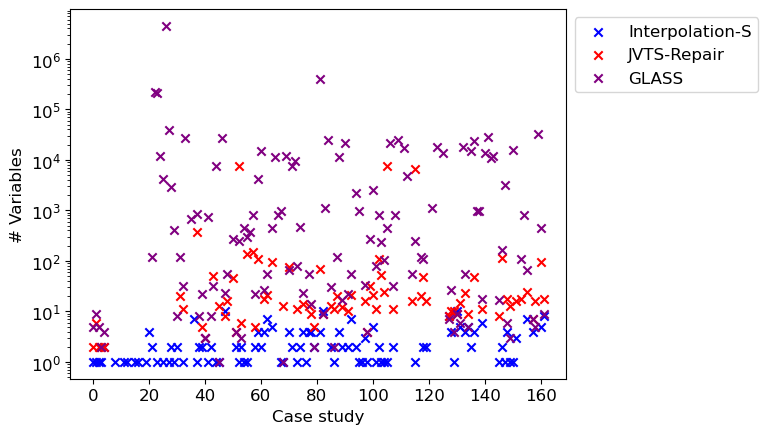

In [81]:

column = "MinNumVariables"

label = "# Variables"

marker = "x"

x_ticks = range(len(df))

plt.rcParams.update({'font.size': 12})

# Plot the data with specified colors
plt.scatter(x_ticks, df_interpolation[column], label='Interpolation-S', color='blue', marker=marker)
plt.scatter(x_ticks, df_jvts[column], label='JVTS-Repair', color='red', marker=marker)
plt.scatter(x_ticks, df_glass[column], label='GLASS', color='purple', marker=marker)

# Add labels and title
plt.xlabel('Case study')
plt.ylabel(label)

plt.yscale('log')

# Place legend on the right outside of the graph
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.show()

In [95]:
bins = [0, 1, 10, 100, float('inf')]
labels = ['<1s', '1s-10s', '10s-100s', '>100s']

# df = df_interpolation
# df = df_jvts
df = df_glass

# Add a new column with the categories
df['Interval'] = pd.cut(df['TimeToFirst'], bins=bins, labels=labels, right=False)
df['Interval'] = df['Interval'].cat.add_categories('Unrepaired')
df['Interval'].fillna('Unrepaired', inplace=True)

df['Interval'].value_counts()

<1s           129
Unrepaired     20
10s-100s        6
1s-10s          4
>100s           3
Name: Interval, dtype: int64

In [ ]:
import os
import pandas as pd
import re

def remove_comments(file_contents):
    return re.sub(r"/\*.*?\*/", "", file_contents, flags=re.DOTALL)

def count_keywords(file_contents):
    keyword_counts = {"env ": 0, "sys ": 0, "aux ": 0, "assumption": 0, "guarantee": 0}
    lines = file_contents.split('\n')
    for line in lines:
        for keyword in keyword_counts.keys():
            keyword_counts[keyword] += line.count(keyword)
    return keyword_counts

def process_folder(folder_path):
    data = []
    for root, _, files in os.walk(folder_path):
        for file_name in files:
            if file_name.endswith(".spectra"):
                file_path = os.path.join(root, file_name)
                # print(f"Processing file: {file_path}")
                with open(file_path, "r") as file:
                    file_contents = file.read()
                    # cleaned_contents = remove_comments(file_contents)
                    keyword_counts = count_keywords(file_contents)
                    data.append({"File": file_name, **keyword_counts})

    df = pd.DataFrame(data)
    return df


folder_path = "inputs/SYNTECH15-1UNREAL"
result_df = process_folder(folder_path).sort_values("File")

# Read your CSV file into a DataFrame
# Replace 'your_file.csv' with the actual file name
df = result_df

# Filter the DataFrame to include only rows where "File" starts with "System"
system_df = df[df['File'].str.startswith('G')]

# Calculate the min, average, and max for each column
summary = system_df.describe()

# Select the desired columns
columns_of_interest = ['env ', 'sys ', 'aux ', 'assumption', 'guarantee']

# Select the rows corresponding to min, mean (average), and max
dff = summary.loc[['min', 'mean', 'max'], columns_of_interest]

dff